# 3 Probability and Information Theory

## 3.4 Marginal Probability

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Possibilities of dice pairs:
 [(2, 2), (3, 5), (3, 3), (1, 5), (4, 6), (6, 3), (5, 1), (2, 1), (3, 2), (4, 5), (2, 3), (1, 4), (1, 3), (4, 1), (6, 4), (6, 1), (1, 2), (2, 4), (3, 4), (1, 1), (1, 6), (3, 1), (5, 4), (5, 2), (6, 2), (5, 3), (4, 2), (5, 5), (2, 5), (4, 4), (2, 6), (4, 3), (5, 6), (6, 6), (3, 6), (6, 5)]
Number of appearance of each dice pair: 
 [2679, 2757, 2772, 2802, 2786, 2751, 2896, 2786, 2805, 2722, 2772, 2837, 2781, 2712, 2788, 2762, 2813, 2964, 2807, 2721, 2773, 2728, 2722, 2788, 2698, 2859, 2796, 2702, 2737, 2756, 2841, 2758, 2717, 2789, 2778, 2845]


<Container object of 36 artists>

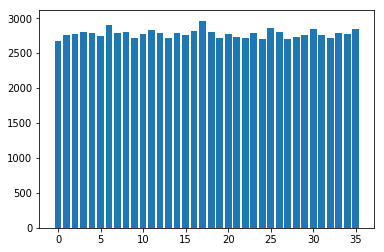

In [2]:
def dice():
    return np.random.randint(1,7)

# Shaking the dice 100000 times
trials = []
for _ in range(100000):
    trials.append((dice(), dice()))

pairs, counts = [], []
for trial in trials:
    if trial not in pairs:
        pairs.append(trial)
        counts.append(0)
    counts[pairs.index(trial)] += 1
    
print("Possibilities of dice pairs:\n", pairs)
print("Number of appearance of each dice pair: \n", counts)
plt.bar(range(len(pairs)), counts)

In [3]:
probs = []
for pair in pairs:
    count = trials.count(pair)
    prob = count / len(trials)
    probs.append(prob)
    print("{}: count={}/{}, p={} ({}%)".format(pair, count,len(trials), prob, prob*100))
    
print('-' * 50)
print("Probabilities: ", probs)
print("Sum of all probabilities: ", np.sum(probs))

(2, 2): count=2679/100000, p=0.02679 (2.6790000000000003%)
(3, 5): count=2757/100000, p=0.02757 (2.757%)
(3, 3): count=2772/100000, p=0.02772 (2.7720000000000002%)
(1, 5): count=2802/100000, p=0.02802 (2.802%)
(4, 6): count=2786/100000, p=0.02786 (2.786%)
(6, 3): count=2751/100000, p=0.02751 (2.751%)
(5, 1): count=2896/100000, p=0.02896 (2.896%)
(2, 1): count=2786/100000, p=0.02786 (2.786%)
(3, 2): count=2805/100000, p=0.02805 (2.8049999999999997%)
(4, 5): count=2722/100000, p=0.02722 (2.722%)
(2, 3): count=2772/100000, p=0.02772 (2.7720000000000002%)
(1, 4): count=2837/100000, p=0.02837 (2.8369999999999997%)
(1, 3): count=2781/100000, p=0.02781 (2.781%)
(4, 1): count=2712/100000, p=0.02712 (2.7119999999999997%)
(6, 4): count=2788/100000, p=0.02788 (2.788%)
(6, 1): count=2762/100000, p=0.02762 (2.762%)
(1, 2): count=2813/100000, p=0.02813 (2.8129999999999997%)
(2, 4): count=2964/100000, p=0.02964 (2.964%)
(3, 4): count=2807/100000, p=0.02807 (2.807%)
(1, 1): count=2721/100000, p=0.0272

Here you can see that each probability is around 2.78% (1/36).

Now, let's marginalize the second trial.

In [4]:
marginalized_counts = np.zeros(6)
for trial in trials:
    '''
    Here, all second trials are marginalized.
    ex) The probabilities of (2,1), (2,2), ..., (2,6) 
        are all aggregated to "2".
    '''
    marginalized_counts[trial[0] - 1] += 1

# Computing the marginalized probabilities
probs = []
for i, count in enumerate(marginalized_counts):
    prob = count / len(trials)
    probs.append(prob)
    print("{}: count={}/{}, p={} ({}%)".format(i, int(count),len(trials), prob, prob*100))
    
print('-' * 50)
print("Probabilities: ", probs)
print("Sum of all probabilities: ", np.sum(probs))

0: count=16727/100000, p=0.16727 (16.727%)
1: count=16779/100000, p=0.16779 (16.779%)
2: count=16647/100000, p=0.16647 (16.647000000000002%)
3: count=16530/100000, p=0.1653 (16.53%)
4: count=16684/100000, p=0.16684 (16.683999999999997%)
5: count=16633/100000, p=0.16633 (16.633%)
--------------------------------------------------
Probabilities:  [0.16727, 0.16778999999999999, 0.16647000000000001, 0.1653, 0.16683999999999999, 0.16633000000000001]
Sum of all probabilities:  1.0


Now each probability takes around 16.667% (1/6) after the marginalization.